![title](https://media-cdn.tripadvisor.com/media/photo-b/1024x250/15/33/f7/4d/lyon.jpg)

# <center> Sciences de gestion en hôtellerie et tourisme: comment extraire et utiliser les données de Tripadvisor.com pour analyser le service hôtelier à Lyon</center>

 <center> <a href="http://www.roqueleal.me">Roque Leal</a> </center>

TripAdvisor, l'un des plus grand site de voyage au monde, numéro un de publications d'avis est devenu juste incontournable! Dans ce projet, nous allons extraire les données hôtelières de Lyon de 20 pages du site TripAdvisor. Nous obtiendrons des informations sur l'ID de l'hôtel, qui est un numéro unique de chaque hôtel, nom, note, équipements, fournisseur et avis. Nous examinerons différentes fonctionnalités telles que le prix, les équipements et les notes qui vous aideront à réserver un hôtel la prochaine fois que vous planifiez un voyage à Lyon! Nous analyserons également les avis pour comprendre que la prochaine fois que vous réserverez un hôtel et paierez un prix plus élevé pour un hôtel bien noté, cela en vaut-il vraiment la peine? 
 
** Pour faire cette analyse, nous nous concentrons sur les éléments suivants:**

1.- Nous allons extraire les données de Tripadvisor

2.- Nous aborderons les équipements hôtelier

3.- Nous explorerons les commodités populaires de l'hôtel

4.- Nous saurons quels hôtels sont les mieux évalués

5.- Nous découvrirons les meilleurs prestataires de réservation d'hôtels

6.- Nous analyserons les avis des hôtels pour trouver les 20 mots les plus fréquents

7.- Nous analyserons les opinions des commentaires.

8.- Nous analyserons l'évaluation des sentiments des commentaires en fonction du ranking de l'hôtel.

**Bien, faisons ça!**

## Extraction et parseur les données Tripadvisor

In [37]:
#Import librairies
from requests import get
import re
import seaborn as sns
import matplotlib.pyplot as plt
import string
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
from bs4 import BeautifulSoup
#import time
from random import randint
from time import time
from time import sleep
from IPython.core.display import clear_output
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [38]:
#Requests
page = get("https://www.tripadvisor.com/Hotels-g187265-Lyon_Rhone_Auvergne_Rhone_Alpes-Hotels.html")

In [39]:
#Créez une instance de la classe BeautifulSoup pour analyser notre document
parser = BeautifulSoup(page.content, "lxml")

In [40]:
#Get data
hotels = parser.find_all("div", {'class' : 'prw_rup prw_meta_hsx_responsive_listing ui_section listItem'})

In [41]:
print (parser.head.find('title').text)
print ("Found", len(hotels), "hotels")

THE 10 BEST Hotels in Lyon for 2020 (from $51) - Tripadvisor
Found 30 hotels


In [42]:
#Sur ce site, chaque page compte 30 hôtels, et c'est la seule différence dans les sites de chaque page.
pages = [str(i) for i in range(0,600,30)]
print (pages)

['0', '30', '60', '90', '120', '150', '180', '210', '240', '270', '300', '330', '360', '390', '420', '450', '480', '510', '540', '570']


In [43]:
#Scrapper
name = []
new_price = []
orig_price = []
bubbles = []
review_count = []
review_url = []
amenities = []
provider = []
reviews = []


start_time = time()
requests = 0


for page in pages:

    page = get('https://www.tripadvisor.com/Hotels-g187265-oa' + page + '-Lyon_Rhone_Auvergne_Rhone_Alpes-Hotels.html')
    

    sleep(randint(8,15))


    requests += 1
    elapsed_time = time() - start_time
    print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

    if page.status_code != 200:
        warn('Request: {}; Status code: {}'.format(requests, page.status_code))


    if requests > 72:
        warn('Number of requests was greater than expected.')
        break
        

    parser = BeautifulSoup(page.content, "lxml")    
    
    hotels = parser.find_all("div", {'class' : 'prw_rup prw_meta_hsx_responsive_listing ui_section listItem'})
    
    for hotel in hotels:

        nm = hotel.find("div", {"class" : "listing_title"}).get_text()
        name.append(nm)
        
       

        np = hotel.find('div', {"class" : "price autoResize"})

        if np:
            new_price.append(np.text)
        else:
            new_price.append("")
        

        op = hotel.find('div', {"class" : "xthrough"})#.text
        orig_price.append(op)
        

        bub = hotel.find(class_="ui_bubble_rating")

        if bub:
            bubbles.append(bub.get("alt"))      
        else:
            bubbles.append("")
        

        rc = hotel.find(class_="review_count")

        if rc:
            review_count.append(rc.get_text(strip=True))
        else:
            review_count.append("")
        

        ru = hotel.find(class_="ui_bubble_rating")

        if ru:
            review_url.append(ru.get("href"))
        else:
            review_url.append("")
        

        am = hotel.find("div", {"class" : "prw_rup prw_common_hotel_icons_list linespace is-shown-at-tablet"}).text
        amenities.append(am)
        

        prov = hotel.find(class_="provider_text")

        if prov:
            provider.append(prov.text)
        else:
            provider.append("")
        

        rev = hotel.find("a", {"class" : "review-link"})

        if rev:
            reviews.append(rev["title"])
        else:
            reviews.append("")

Request:20; Frequency: 0.059569106329448195 requests/s


In [44]:
#Appelez la classe DataFrame et passez chaque liste d'éléments sous forme de dictionnaire. 
hotels = pd.DataFrame({

    "name" : name,
    "discounted_price" : new_price,
    "original_price" : orig_price,
    "bubbles" : bubbles,
    "review_count" : review_count,
    "review_url" : review_url,
    "amenities" : amenities,
    "provider" : provider,
    "reviews" : reviews
})

In [45]:
#Vérifier les données
hotels.head(2)

,name,discounted_price,original_price,bubbles,review_count,review_url,amenities,provider,reviews
0,Hotel Lyon Metropole,$133,None,4 of 5 bubbles,"1,837 reviews",/Hotel_Review-g187265-d232351-Reviews-Hotel_Ly...,Free Wifi Free parking,Tripadvisor,"The ￹room was large￻, modern and very clean it..."
1,Hotel Carlton Lyon - MGallery Collection,$162,None,4.5 of 5 bubbles,"1,880 reviews",/Hotel_Review-g187265-d232355-Reviews-Hotel_Ca...,Free Wifi Room service,Tripadvisor,... the river and the old town with it's wonde...


In [46]:
#Vérifiez le nombre d'enregistrements
hotels.shape

(592, 9)

**Nous avons extrait les données de 592 hôtels de la ville de Lyon**

### Data Cleaning

Les données supprimées du site Web comportent de nombreuses anomalies qui doivent être corrigées pour obtenir un ensemble de données propre avant de pouvoir commencer à analyser. Nous effectuerons les étapes ci-dessous pour nettoyer les données:

Supprimer "Sponsorisé" du nom de l'hôtel.
Supprimer les lignes en double
Supprimez "property_" de l'ID de l'hôtel.
Supprimer "$" du prix réduit des hôtels.
Supprimez "#REVIEWS" et "/" des URL d'avis sur les hôtels.
Colonne propre des équipements de l'hôtel pour les séparer par des virgules.
Nettoyer les bulles, les colonnes review_count, discounted_price
Pour certains hôtels. le prix d'origine est manquant, mais nous avons le prix réduit. Par conséquent, créez une nouvelle colonne de prix.
Modifiez les types de données.
Gérer les valeurs nulles

In [47]:
def clean_name(name):
    if "Sponsored" in name:
        return (name.replace("Sponsored", ""))
    else:
        return name

In [48]:
hotels["name"] = hotels["name"].apply(clean_name)

In [49]:
hotels = hotels.drop_duplicates()

In [50]:
#Nous vérifions le nombre d'hôtels après avoir supprimé les données répétées
hotels.shape

(330, 9)

Le nombre de rangées est passé de 592 à 326 hôtels

In [51]:
hotels["name"] = hotels["name"].str.replace("property_", "")
hotels["discounted_price"] = hotels["discounted_price"].str.replace("$", "")
hotels["review_url"] = hotels["review_url"].str.replace("/","")
hotels["review_url"] = hotels["review_url"].str.replace("#REVIEWS", "")

In [52]:
def split_func(amenities):
    
    if amenities:
        output = re.sub('(?=[A-Z])', ' ', amenities).strip()
        output1 = re.sub(r' ([^ ]*(?: |$))', r',\1', output)
        if "Free" in output1:
            output1 = output1.replace(',', '', 1)
        if not output1:
            return np.nan
        else:
            return (output1)       
    else:
        return "None"

In [53]:
hotels["amenities"] = hotels["amenities"].apply(split_func)

In [54]:
def clean_bubbles(rating):
    return (rating.split(" ")[0])

In [55]:
hotels["bubbles"] = hotels["bubbles"].apply(clean_bubbles)

In [56]:
hotels["review_count"] = hotels["review_count"].str.replace("reviews", "")
hotels["review_count"] = hotels["review_count"].str.replace("review", "")

In [57]:
hotels["name"] = hotels["name"].str.replace("property_", "")
hotels["review_count"] = hotels["review_count"].str.replace(",","")
hotels["discounted_price"] = hotels["discounted_price"].str.replace(",","")

In [58]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              330 non-null    object
 1   discounted_price  330 non-null    object
 2   original_price    0 non-null      object
 3   bubbles           330 non-null    object
 4   review_count      330 non-null    object
 5   review_url        330 non-null    object
 6   amenities         330 non-null    object
 7   provider          330 non-null    object
 8   reviews           330 non-null    object
dtypes: object(9)
memory usage: 25.8+ KB


In [59]:
hotels["original_price"].value_counts(dropna = False).head(5)

NaN    330
Name: original_price, dtype: int64

In [60]:
def clean_price(price):
    price = str(price)
    if price == "0":
        return np.nan
    else:
        return (price.split("$")[1].split("<")[0])

In [61]:
hotels["original_price"].fillna(0, inplace=True)
hotels["original_price"] = hotels["original_price"].apply(clean_price)

In [62]:
hotels["review_count"] = hotels["review_count"].astype(int)

In [63]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              330 non-null    object
 1   discounted_price  330 non-null    object
 2   original_price    0 non-null      object
 3   bubbles           330 non-null    object
 4   review_count      330 non-null    int32 
 5   review_url        330 non-null    object
 6   amenities         330 non-null    object
 7   provider          330 non-null    object
 8   reviews           330 non-null    object
dtypes: int32(1), object(8)
memory usage: 24.5+ KB


In [64]:
hotels["review_count"].fillna(0, inplace=True)
hotels["bubbles"].fillna(0, inplace=True)

In [65]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 0 to 561
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              330 non-null    object
 1   discounted_price  330 non-null    object
 2   original_price    0 non-null      object
 3   bubbles           330 non-null    object
 4   review_count      330 non-null    int32 
 5   review_url        330 non-null    object
 6   amenities         330 non-null    object
 7   provider          330 non-null    object
 8   reviews           330 non-null    object
dtypes: int32(1), object(8)
memory usage: 24.5+ KB


In [66]:
#Nous vérifions les données après avoir nettoyé les erreurs et changé le type de données
hotels.head()

,name,discounted_price,original_price,bubbles,review_count,review_url,amenities,provider,reviews
0,Hotel Lyon Metropole,133,None,4,1837,Hotel_Review-g187265-d232351-Reviews-Hotel_Lyo...,"Free Wifi, Free,parking",Tripadvisor,"The ￹room was large￻, modern and very clean it..."
1,Hotel Carlton Lyon - MGallery Collection,162,None,4.5,1880,Hotel_Review-g187265-d232355-Reviews-Hotel_Car...,"Free Wifi, Room,service",Tripadvisor,... the river and the old town with it's wonde...
2,Hotel Vaubecour,97,None,4.5,617,Hotel_Review-g187265-d1058931-Reviews-Hotel_Va...,Free Wifi,Tripadvisor,"Very central location, ￹comfortable room￻, enj..."
3,Mercure Lyon Centre Beaux Arts,143,None,4.5,1404,Hotel_Review-g187265-d219782-Reviews-Mercure_L...,"Free Wifi, Bar/,Lounge",Tripadvisor,We stayed two nights here in late May - I thin...
4,Villa Florentine,307,None,4.5,1091,Hotel_Review-g187265-d551461-Reviews-Villa_Flo...,"Free Wifi, Pool",Tripadvisor,We were upgraded to a suite which had a hall w...


### Analyse
Examinons les différentes tendances de notre ensemble de données pour en déduire des modèles et obtenir des informations que nous pouvons utiliser avant de réserver notre prochain voyage à Lyon!

#### Quels sont les équipements hôteliers populaires fournis par les hôtels?

In [67]:
hotels["amenities"].value_counts().head(10)

Free Wifi                    112
None                          70
Free Wifi, Restaurant         48
Free Wifi, Bar/,Lounge        27
Free Wifi, Pool               17
Free Wifi, Free,parking       17
Free Wifi, Room,service       11
Free Wifi, Fitness,center      7
Bar/,Lounge                    4
Restaurant, Room,service       3
Name: amenities, dtype: int64

In [88]:
#Un graphique à barres des 10 meilleurs services hôteliers les plus populaires
hotel_amenities_bar = go.Bar(y = hotels["amenities"].value_counts().head(10).values, 
                             x = hotels["amenities"].value_counts().head(10).index)
layout = go.Layout(title = "Commodités Hôtelières Populaires", yaxis_title = "Count")
fig = go.Figure(hotel_amenities_bar, layout)
#iplot(fig)

![title](https://roqueleal.me/images/commodites.jpg)

#### Quels hôtels ont le score le plus score?

In [89]:
rating_price_bar = go.Bar(x=hotels["bubbles"], y=hotels["name"])
layout = go.Layout(title = "Classement des hôtels selon leur score", yaxis_title = "Name", xaxis_title = "Score")
fig = go.Figure(rating_price_bar,layout)
#iplot(fig)

![title](https://roqueleal.me/images/classement.jpg)

#### Découvrez les fournisseurs de réservation

In [91]:
providers_bar = go.Bar(x=hotels["provider"].value_counts().head(10).index, 
                       y=hotels["provider"].value_counts().head(10).values)                          
layout = go.Layout(title = "Prestataires de Réservation d'Hôtel Populaires", yaxis_title = "Count")
fig = go.Figure(providers_bar,layout)
#iplot(fig)

![title](https://roqueleal.me/images/prestataires.jpg)

Il semble que Nustay.com soit le site le plus populaire pour les réservations d'hôtel et les remises, suivi d'un énorme écart par Expedia.com.

#### Quels hôtels sont les plus populaires avec plus d'avis?

In [71]:
hotels.sort_values("review_count", ascending = False)[["name", "review_count"]].head(5)

,name,review_count
521,Sofitel Lyon Bellecour,2471
544,Ibis Lyon Part Dieu Les Halles,1969
385,Hotel Carlton Lyon - MGallery Collection,1880
1,Hotel Carlton Lyon - MGallery Collection,1880
407,Hotel Lyon Metropole,1837


### Analyse des Reviews sur les hôtels

Nous analyserons les avis sur les hôtels pour rechercher les mots les plus fréquents et attribuerons également des sentiments aux avis - positifs, négatifs ou neutres en fonction du texte. Mais, avant de pouvoir le faire, nous devons nettoyer le texte pour supprimer les signes de ponctuation et les mots vides.

**Pour cette étude, nous nous concentrerons sur les commentaires enregistrés en anglais**

In [72]:
pd.set_option('max_colwidth', 5000)
def clean_review(review):
    return review.replace("￹", "")

In [73]:
hotels["reviews"] = hotels["reviews"].apply(clean_review)

In [74]:
punctuations = string.punctuation

In [75]:
hotels["reviews"] = hotels["reviews"].apply(lambda x : x.lower())
hotels["reviews"] = hotels["reviews"].apply(lambda x : ''.join([a for a in x if a not in punctuations]))

In [76]:
hotels['review_length'] = hotels["reviews"].apply(lambda x: 0 if x == "none" else len(x))

In [77]:
hotels.head(2)

,name,discounted_price,original_price,bubbles,review_count,review_url,amenities,provider,reviews,review_length
0,Hotel Lyon Metropole,133,None,4,1837,Hotel_Review-g187265-d232351-Reviews-Hotel_Lyon_Metropole-Lyon_Rhone_Auvergne_Rhone_Alpes.html,"Free Wifi, Free,parking",Tripadvisor,the room was large￻ modern and very clean it had a separate bedroom for us which was an added bonus,99
1,Hotel Carlton Lyon - MGallery Collection,162,None,4.5,1880,Hotel_Review-g187265-d232355-Reviews-Hotel_Carlton_Lyon_MGallery_Collection-Lyon_Rhone_Auvergne_Rhone_Alpes.html,"Free Wifi, Room,service",Tripadvisor,the river and the old town with its wonderful basilica shops bars and restaurantswe found our room extremely comfortable￻ and would not hesitate to recommend this hotel to anyone visiting this lovely city,205


#### Print Reviews Statistics

In [78]:
print('La moyenne de la longueur des Reviews:',hotels['review_length'].mean())
print('L*écart type de la longueur des Reviews:',hotels['review_length'].std())
print('Le maximum de la longueur des Reviews:',hotels['review_length'].max())

La moyenne de la longueur des Reviews: 127.4939393939394
L*écart type de la longueur des Reviews: 82.09018111502637
Le maximum de la longueur des Reviews: 214


####  Mots fréquents dans les revues

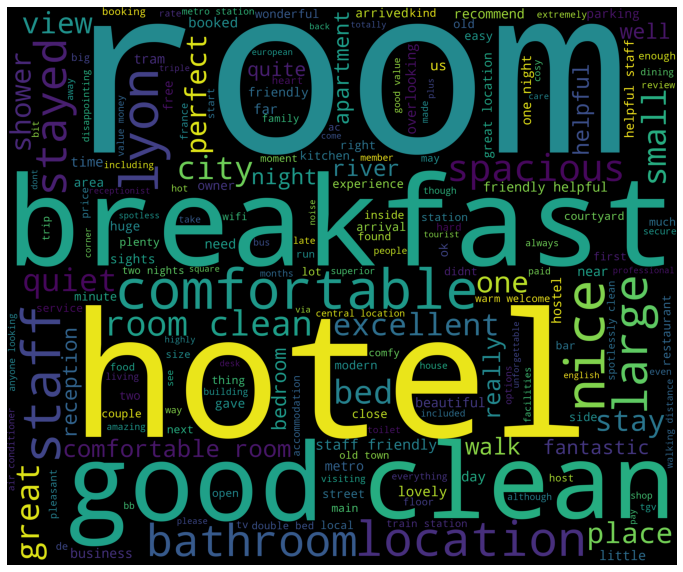

In [79]:
words = " ".join(hotels['reviews'])
                 
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(words)
                 
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### Analysez les avis des hôtels pour trouver les 20 mots les plus fréquemment utilisés

Nous utiliserons CountVectorizer. Il compte le nombre de fois qu'un jeton apparaît dans les Reviews et utilise cette valeur comme poids.

In [92]:
#Instancier l'objet vectoriseur
cv = CountVectorizer(stop_words = 'english')

#Convertissez les reviews en une matrice - où chaque ligne représente un texte spécifique dans les avis et chaque colonne représente
#un mot dans le vocabulaire. mots [i, j] est l'occurrence du mot j dans le texte i.
words = cv.fit_transform(hotels["reviews"])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

word_freq_bar = go.Bar(x = frequency["word"].head(10), y = frequency["freq"].head(10))
layout = go.Layout(title = "TOP 20 des Mots Fréquentes", yaxis_title = "Count")
fig = go.Figure(word_freq_bar,layout)
#iplot(fig)

![title](https://roqueleal.me/images/mots.jpg)

### Attribuer un sentiment aux Reviews sur les hôtels et les analyser
Nous utiliserons VADER (Valence Aware Dictionary et sEntiment Reasoner) qui est un lexique et un outil d'analyse des sentiments basé sur des règles qui est spécifiquement adapté aux sentiments exprimés dans les médias sociaux. VADER nous parle non seulement du score de Positivité et de Négativité, mais nous indique également à quel point un sentiment est positif ou négatif. Il ne nécessite aucune donnée de formation, mais est construit à partir d'un lexique de sentiment étalon-or généralisable, basé sur la valence.

In [81]:
def sentiment_scores(sentence): 

    sid_obj = SentimentIntensityAnalyzer() 
  

    sentiment_dict = sid_obj.polarity_scores(sentence) 
    

    if sentiment_dict['compound'] >= 0.05 : 
        return ("Positive") 
  
    elif sentiment_dict['compound'] <= - 0.05 : 
        return ("Negative") 
  
    else : 
        return ("Neutral") 

In [82]:
hotels["sentiment"] = hotels["reviews"].apply(sentiment_scores)

In [94]:
hotel_sentiments = hotels.groupby("sentiment", as_index=False)["name"].count()

word_freq_bar = go.Bar(x = hotel_sentiments["sentiment"], y = hotel_sentiments["name"])                      
layout = go.Layout(title = "Sentiments Hôtels Lyon", yaxis_title = "Count")
fig = go.Figure(word_freq_bar,layout)
#iplot(fig)

![title](https://roqueleal.me/images/sentiments.jpg)

Dans l'ensemble, les hôtels ont des sentiments positifs dans leurs commentaires avec très peu de sentiments négatifs.

### Les hôtels de haut rank valent-ils vraiment leur classement sur la base des reviews?

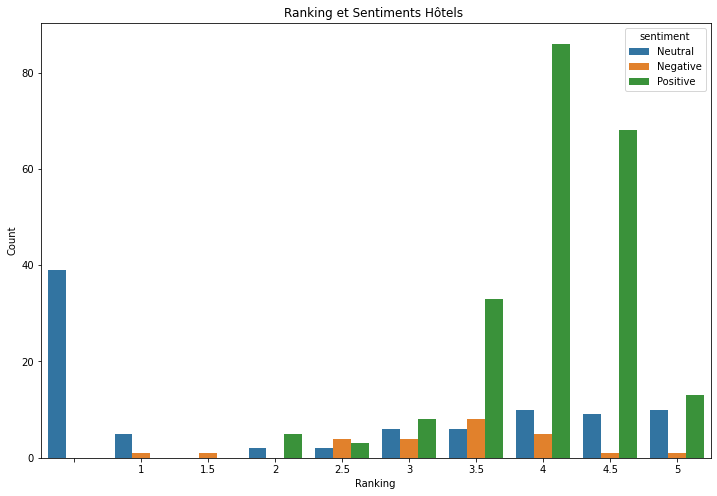

In [84]:
rating_sentiment = hotels.groupby(["bubbles", "sentiment"], as_index = False)["name"].count()

plt.figure(figsize=(12, 8))
sns.barplot(x="bubbles", hue="sentiment", y="name", data=rating_sentiment)
plt.ylabel("Count")
plt.xlabel("Ranking")
plt.title("Ranking et Sentiments Hôtels ")
plt.show()

Il semble que ce ne soit pas nécessairement le cas, regardons maintenant les prestataires hôteliers

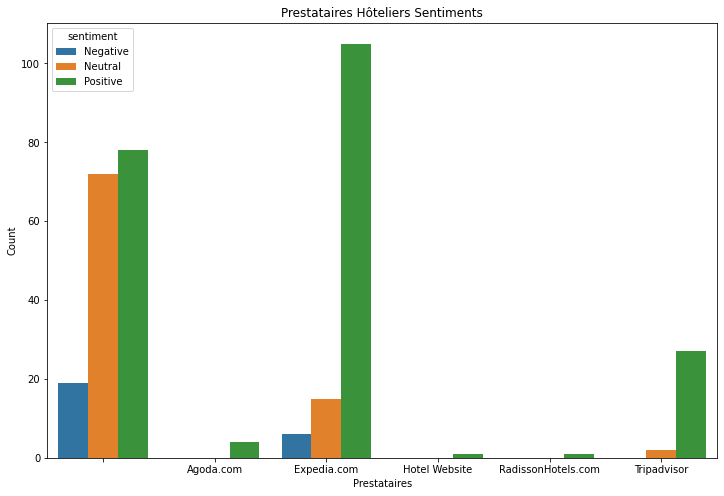

In [85]:
rating_sentiment = hotels.groupby(["provider", "sentiment"], as_index = False)["name"].count()

plt.figure(figsize=(12, 8))
sns.barplot(x="provider", hue="sentiment", y="name", data=rating_sentiment)
plt.ylabel("Count")
plt.xlabel("Prestataires")
plt.title("Prestataires Hôteliers Sentiments")
plt.show()

### Conclusion
Ce projet de recherche vise à creuser un riche ensemble de Tripadvisor données, à découvrir des informations exploitables qui peuvent avoir un réel impact sur les Hôtels de Lyon. 

Ce type d'analyse peut effet immédiat et tangible pour aidera les hôtels et prestataires hôteliers à améliorer l'expérience actuellement proposée. 

Les hôtels subissent actuellement un changement stratégique pivot, et les informations seront également intégrées aux futures itérations des stratégies d'affichage et d'audience. Cette recherche pionnière pourrait potentiellement avoir un impact sur le reste du secteur hôtelier et ouvrir la voie à une nouvelle méthode d'évaluation et de recherche.

Par exemple, nous avons rapidement réussi à avoir une base de données d'hôtels à Lyon et à découvrir de précieuses informations en utilisant Tripadvisor pour découvrir ce qui suit:


1.- Le wifi gratuit et les restaurants sont les services les plus populaires offerts par les hôtels de Lyon.

2.- Les hôtels classés 4 et 4,5 sont les plus fréquentés de la ville.

3.- nustay.com est le site le plus populaire pour les réservations d'hôtel et les remises.
4.- Le Sofitel Lyon Bellecour a le plus d'avis avec 2470

5.- Les commentaires sont plus concentrés sur les mots: chambre, propreté, petit déjeuner, emplacement et confort.

6.- La plupart des commentaires consultés sont positifs.

7.- Le nombre maximum d'hôtels classés 3 et 4 a beaucoup d'avis avec un sentiment positif.

8.- Les hôtels avec une note inférieure à 5 ont des sentiments plus négatifs.

9.- Expedia.com enregistre le moins de commentaires négatifs.

## 👍👍 <center> <a href="https://www.linkedin.com/in/lealrlx/">Partagez vos idées et vos commentaires, écrivez-moi 🌍 </a> </center>##